In [3]:
from importlib.resources import path
from urllib.request import Request, urlopen
from keras.datasets import mnist
from keras.callbacks import TensorBoard
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import InputLayer,Conv2D, Flatten, Dense,UpSampling2D
import numpy as np
import matplotlib.pyplot as plt
import random


class Image_Denoising_AutoEncoder:

    def ___init__(self):
        self.x_train=None
        self.x_test=None
        self.x_train_noisy=None
        self.x_test_noisy=None
        self.Model=None

    def CreateNetwork(self):
        #Encoder Definition
        print("Creating Network...")
        input_img = layers.Input(shape=(784,))#keras.Input(shape=(28, 28, 1))
        Encoder = layers.Dense(400, activation='relu')(input_img)
        Encoder = layers.Dense(300, activation='relu')(Encoder)
        Encoder = layers.Dense(150, activation='relu')(Encoder)
        LatentSpace = layers.Dense(65, activation='relu')(Encoder)#buttle neck layer

        # Decoder Definition
        
        Decoder = layers.Dense(150, activation='relu')(LatentSpace)
        Decoder = layers.Dense(300, activation='relu')(Decoder)
        Decoder = layers.Dense(400, activation='relu')(Decoder)
        decoded = layers.Dense(784, activation='relu')(Decoder)

        self.Model = keras.Model(input_img, decoded)
        self.Model.compile(optimizer='adam', loss='binary_crossentropy')

    def Train(self,_epochs):
        print("Training Network")
        self.Model.fit(self.x_train_noisy, self.x_train,
                    epochs=_epochs,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(self.x_test_noisy, self.x_test),
                    callbacks=[TensorBoard(log_dir='E:\\darsi\\arshad\\fault tolerance\\computer assignment 2\\FTS_CA_2\\model', histogram_freq=0, write_graph=False)])

    def PrepareDataset(self):
        (self.x_train, _), (self.x_test, _) = mnist.load_data()
        self.x_train = self.x_train.astype('float32') / 255.
        self.x_test = self.x_test.astype('float32') / 255.
        
        self.x_train = self.x_train.reshape((len(self.x_train), np.prod(self.x_train.shape[1:])))
        self.x_test = self.x_test.reshape((len(self.x_test), np.prod(self.x_test.shape[1:])))
        
        print(self.x_train.shape,self.x_test.shape)
        #plt.imshow(self.x_train[0].reshape(28,28), cmap="binary")
        return(self.x_test,self.x_train)

    def Display(self,Damaged_Image,Recovered_Image,Original_Image):
        print("Showing Images")
        plt.figure(figsize=(20, 2))
        # Input
        ax = plt.subplot(1, 3, 1)
        plt.imshow(Damaged_Image.reshape(28, 28))
        plt.gray()
        plt.title("Damages_Image")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        # Original Image
        ax = plt.subplot(1, 3, 2)
        plt.imshow(Original_Image.reshape(28, 28))
        plt.gray()
        plt.title("Original_Image")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        #Recovered
        ax = plt.subplot(1, 3, 3)
        plt.imshow(Recovered_Image.reshape(28, 28))
        plt.gray()
        plt.title("Recovered_Image")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        plt.show()
        
    def FaultInject(self,noise_factor):
        
        self.x_train_noisy = self.x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=self.x_train.shape) 
        self.x_test_noisy = self.x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=self.x_test.shape) 

        self.x_train_noisy = np.clip(self.x_train_noisy, 0., 1.)
        self.x_test_noisy = np.clip(self.x_test_noisy, 0., 1.)
        #plt.imshow(self.x_train_noisy[0].reshape(28,28), cmap="binary")
        print("noise is injected")
        return(self.x_test_noisy)

    def SaveModel(self,Path:str):
        print("Saving Model")
        self.Model.save(Path)

    def Forward(self,Damaged_Image):
        Recovered_Image=self.Model.predict(np.array([Damaged_Image,]))[0]
        return Recovered_Image

    def LoadModel(self,Path:str):
        self.Model.load_weights(Path)

    def Test(self):
        self.Model.evaluate(self.x_test_noisy, self.x_test)
        print("evaluation is done") 
    

In [9]:
obj=Image_Denoising_AutoEncoder()
obj.PrepareDataset()
print(len(x_train))

(60000, 784) (10000, 784)
2


(60000, 784) (10000, 784)
noise is injected
Creating Network...
Training Network
Epoch 1/10
235/235 [==============================] - 38s 148ms/step - loss: 0.3910 - val_loss: 0.3383
Epoch 2/10
235/235 [==============================] - 34s 146ms/step - loss: 0.2972 - val_loss: 0.2726
Epoch 3/10
235/235 [==============================] - 34s 143ms/step - loss: 0.2732 - val_loss: 0.2547
Epoch 4/10
235/235 [==============================] - 33s 141ms/step - loss: 0.2638 - val_loss: 0.2480
Epoch 5/10
235/235 [==============================] - 34s 144ms/step - loss: 0.2503 - val_loss: 0.2488
Epoch 6/10
235/235 [==============================] - 34s 146ms/step - loss: 0.2500 - val_loss: 0.2373
Epoch 7/10
235/235 [==============================] - 34s 146ms/step - loss: 0.2596 - val_loss: 0.2830
Epoch 8/10
235/235 [==============================] - 35s 150ms/step - loss: 0.2583 - val_loss: 0.2666
Epoch 9/10
235/235 [==============================] - 34s 146ms/step - loss: 0.2528 - val_loss:

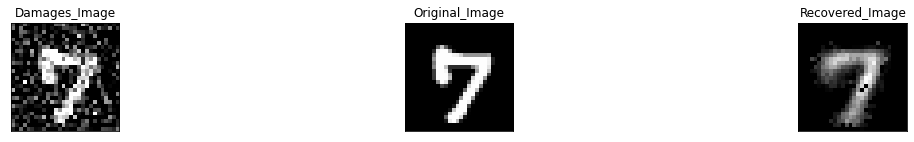

Showing Images


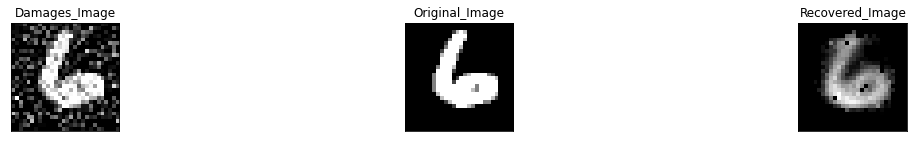

Showing Images


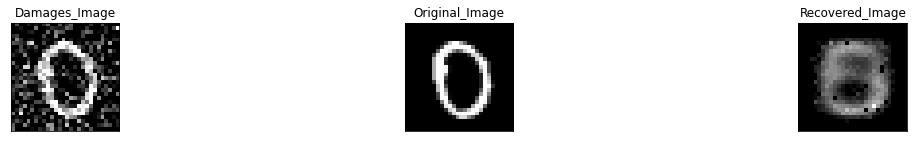

Showing Images


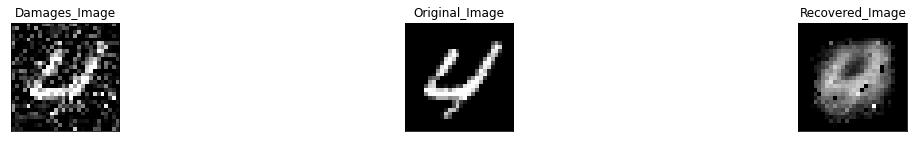

Showing Images


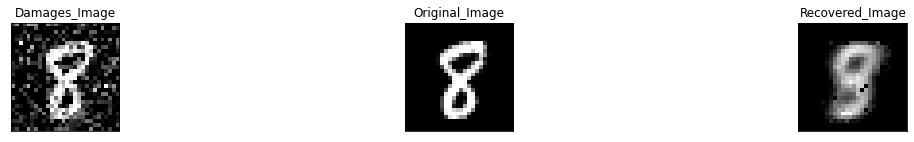

Showing Images


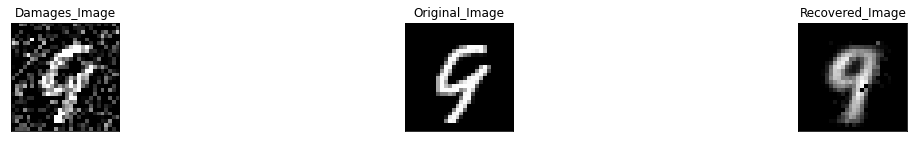

Showing Images


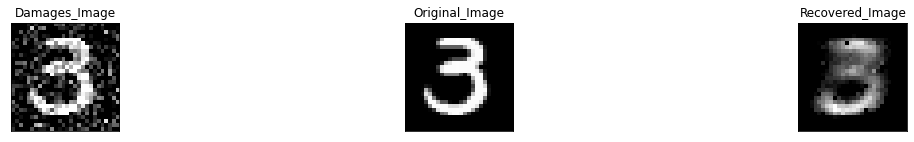

Showing Images


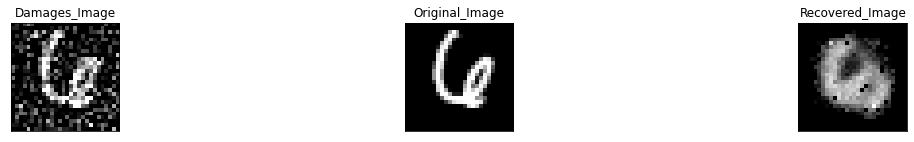

Showing Images


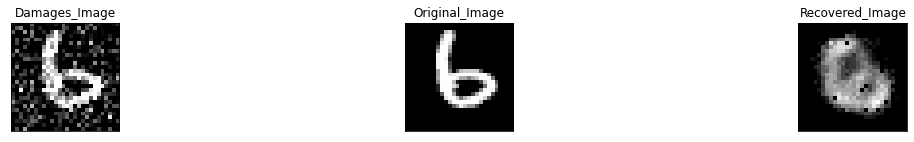

Showing Images


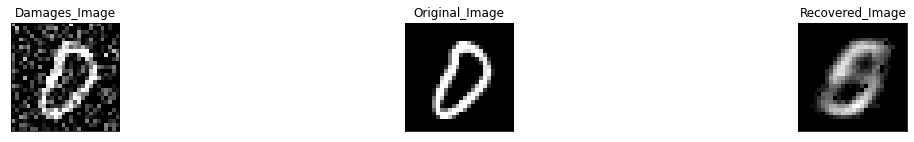

In [2]:
Path='model'
objct=Image_Denoising_AutoEncoder()

originals= objct.PrepareDataset()
fault_images= objct.FaultInject(0.3)
objct.CreateNetwork()
objct.Train(10)
objct.Test()
print("10 samples of 10percent error")
random_index= random.sample(range(0, 10000), 10)
for i in random_index:
    recovered= objct.Forward(fault_images[i])
    objct.Display( fault_images[i], recovered , originals[i])

(60000, 784) (10000, 784)
noise is injected
Creating Network...
Training Network
313/313 [==============================] - 5s 15ms/step - loss: 1.3124
evaluation is done
10 samples of 10percent error
Showing Images


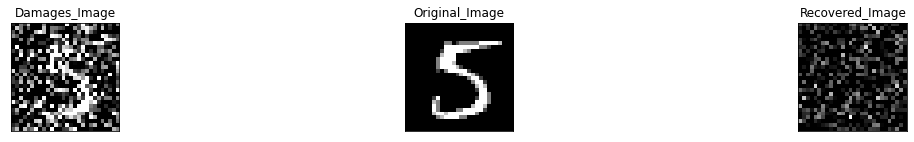

Showing Images


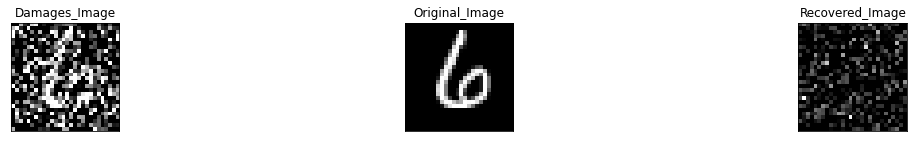

Showing Images


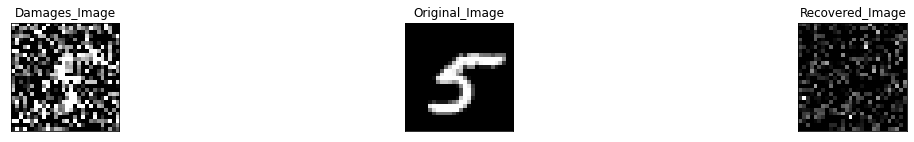

Showing Images


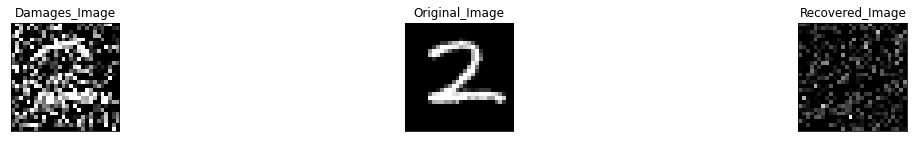

Showing Images


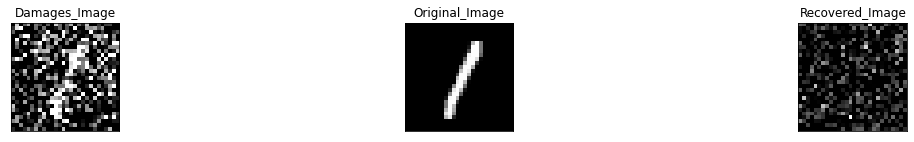

Showing Images


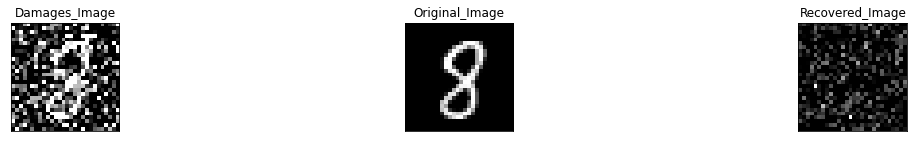

Showing Images


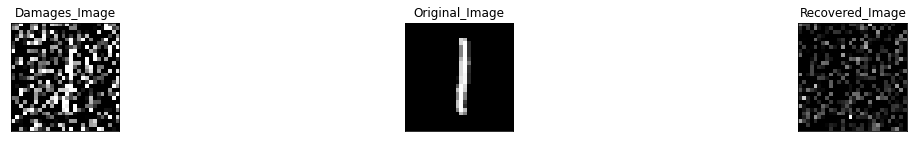

Showing Images


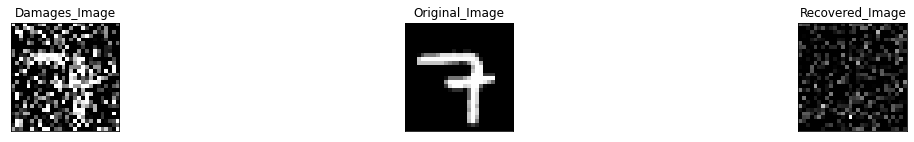

Showing Images


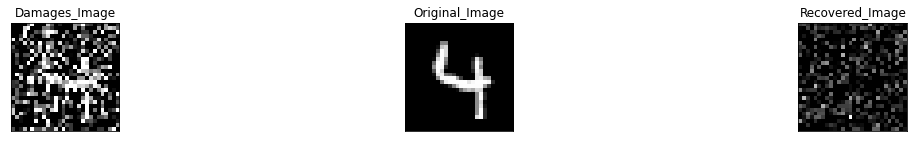

Showing Images


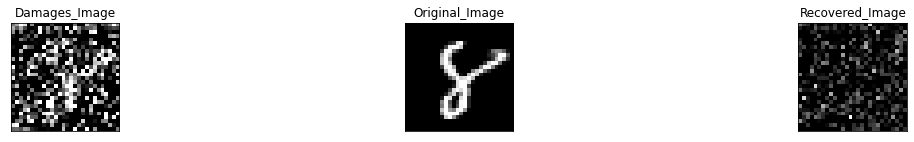

In [3]:
Path='model'
objct=Image_Denoising_AutoEncoder()

originals= objct.PrepareDataset()
fault_images= objct.FaultInject(0.65)
objct.CreateNetwork()
objct.Train(0)
objct.Test()
print("10 samples of 10percent error")
random_index= random.sample(range(0, 10000), 10)
for i in random_index:
    recovered= objct.Forward(fault_images[i])
    objct.Display( fault_images[i], recovered , originals[i])